In [11]:
#Visualize Results from Medical Data
import numpy as np
from scipy.io import loadmat
%matplotlib inline  
import glob,h5py,os,re
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.linewidth']=2.5
mpl.rcParams['lines.markersize']=8
mpl.rcParams['text.usetex']=True
mpl.rcParams['text.latex.unicode']=True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble']= ['\usepackage{amsfonts}','\usepackage{amsmath}']
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['legend.fontsize']=20
#http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
import cPickle as pickle
from datasets.synthp import params_synthetic

markers  = {}
markers[0]  = 'v'
markers[1] = '<'
markers[2]  = '>'
markers[3]  = '8'
markers[4] = '1'
markers[5]  = 'p'
markers[6]  = 's'
markers[7]  = '*'
markers[8] = 's'
markers[9]  = '8'
markers[10]  = 'p'

colors   = {}
colors[0]  = 'k'
colors[1] = 'b'
colors[2]  = 'g'
colors[3]  = 'y'
colors[4] = 'r'
colors[5]  = 'c'
colors[6]  = '#FF6347'
colors[7]  = '#FF6347'
colors[8] = '#C0C0C0'
colors[9]  = '#FF6347'
colors[10]  = 'r'

def getHDF5Data(f):
    ff = h5py.File(f,mode='r')
    alldata = {}
    for k in ff.keys():
        alldata[k] = ff[k].value
    return alldata
def getPKLData(f):
    with open(f,'rb') as f:
        data = pickle.load(f)
    return data
def getCode(f):
    tmap  = {'mlp':'NL','linear':'L'}
    ds    =  f.split('-ds-')[1].split('-')[0]
    etype =  f.split('-etype-')[1].split('-')[0]
    ttype =  f.split('-ttype-')[1].split('-')[0]
    return 'E['+tmap[etype]+']-T['+str(tmap[ttype])+'] ds='+str(ds)

In [12]:
TSBNDIR ='../../../TSBN_code_NIPS2015/medical/'
min_valid = np.inf
for f in glob.glob(TSBNDIR+'/*.mat'):
    data = loadmat(f)
    valid_err = -1*data['valid_bound'].ravel()
    print os.path.basename(f),np.min(valid_err)
    if np.min(valid_err)<min_valid:
        TSBNfile = f
        print 'Setting best to: ',TSBNfile

J200.mat 3.37309974865
Setting best to:  ../../../TSBN_code_NIPS2015/medical/J200.mat
J100.mat 3.15033512686
Setting best to:  ../../../TSBN_code_NIPS2015/medical/J100.mat
J50.mat 3.0937893471
Setting best to:  ../../../TSBN_code_NIPS2015/medical/J50.mat


E[L]-T[L] ../../expt-medical/may14/chkpt_filtered3months_indicators/DKF_lr-8_0000e-04-vm-lstm-inf-mean_field-dh-200-ds-20-nl-relu-opt-adam-bs-250-ep-2000-rd-2_0000e-01-rs-300-tl-2-el-2-ttype-linear-etype-linear-ar-1_0000e+01-iw-1_0000e-01-uid-final.h5 

E[L]-T[NL] ../../expt-medical/may14/chkpt_filtered3months_indicators/DKF_lr-8_0000e-04-vm-lstm-inf-mean_field-dh-200-ds-20-nl-relu-opt-adam-bs-250-ep-2000-rd-2_0000e-01-rs-300-tl-2-el-2-ttype-mlp-etype-linear-ar-1_0000e+01-iw-1_0000e-01-uid-final.h5 

E[NL]-T[L] ../../expt-medical/may14/chkpt_filtered3months_indicators/DKF_lr-8_0000e-04-vm-lstm-inf-mean_field-dh-200-ds-20-nl-relu-opt-adam-bs-250-ep-2000-rd-2_0000e-01-rs-300-tl-2-el-2-ttype-linear-etype-mlp-ar-1_0000e+01-iw-1_0000e-01-uid-final.h5 

E[NL]-T[NL] ../../expt-medical/may14/chkpt_filtered3months_indicators/DKF_lr-8_0000e-04-vm-lstm-inf-mean_field-dh-200-ds-20-nl-relu-opt-adam-bs-250-ep-2000-rd-2_0000e-01-rs-300-tl-2-el-2-ttype-mlp-etype-mlp-ar-1_0000e+01-iw-1_0000e-01-uid-fin

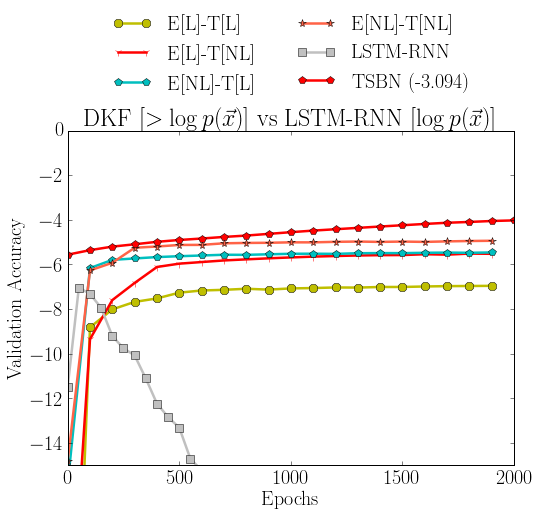

In [15]:
DIR = '../../expt-medical/may14/chkpt_filtered3months_indicators/'

fig_valid,axlist_valid = plt.subplots(1,1,figsize = (8,6))

def plotBounds(ax, x, y,c, m, label = None, ls = 'solid'):
    ax.plot(x,y,label = label,marker =m, color=c,ls=ls)

for idx,f in enumerate(glob.glob(DIR+'/*final.h5')):
    label = getCode(f)
    data = getHDF5Data(f)
    if 'ds=30' in label:
        continue
    label = label.split(' ds')[0]
    print label,f,'\n'
    #Remove 
    X = data['valid_bound'][:,0]
    Y = -data['valid_bound'][:,1]
    plotBounds(axlist_valid, X,Y,colors[idx],markers[idx],label=label)
    #Using same indices for NLl as Bound
    #X = data['valid_bound'][:,0]
    #Y = data['valid_nll']
    #plotBounds(axlist_valid, X,Y,colors[idx],markers[idx],label=label,ls='dashed')

bestRNN='../../expt-medical/may9/chkpt_filtered3months_indicators-rnn/LSTM_lr-8_0000e-04-nl-relu-opt-adam-bs-250-ep-2000-rs-400-rd-3_0000e-01-uid-EP1000-stats.h5'
if os.path.exists(bestRNN):
    print 'BASELINE FOUND'
    data = getHDF5Data(bestRNN)
    X    = data['valid_nll'][:,0].ravel()
    Y    = -data['valid_nll'][:,1].ravel()
    Xmax = axlist_valid.get_xlim()
    toadd= np.arange(X[-1],Xmax[1],100)
    Xnew = np.concatenate([X,toadd])
    Ynew = np.concatenate([Y,np.array([Y[-1]]*len(toadd))])
    plotBounds(axlist_valid, Xnew,Ynew,colors[idx+1],markers[idx+1],label='LSTM-RNN')
else:
    print 'NO BASELINE FOUND'

tsbn = loadmat(TSBNfile)
valid_bound = tsbn['valid_bound'].ravel()
evalInterval = 100;
X    = np.arange(len(valid_bound))*100
Y    = valid_bound
plotBounds(axlist_valid, X,Y,colors[idx+3],markers[idx+3],label='TSBN ('+('%.3f'%np.max(valid_bound))+')')
axlist_valid.set_xlim([0,2000])

#Add plots for results from counterfactuals
cfacResults = False
if cfacResults:
    cfacResults = '../../expt-medical/chkpt_filtered3months_indicators-cfac/DKF_lr-8_0000e-04-vm-lstm-inf-mean_field-dh-200-ds-30-nl-relu-opt-adam-bs-250-ep-2000-rd-2_0000e-01-rs-300-tl-2-el-2-ttype-mlp-etype-mlp-ar-1_0000e+01-iw-1_0000e-01-sum-final.h5'
    data = getHDF5Data(cfacResults)
    Xmax = axlist_valid.get_xlim()
    X    = data['valid_bound'][:,0].ravel()
    Y    = -data['valid_bound'][:,1].ravel()
    plotBounds(axlist_valid, X,Y,colors[idx+2],markers[idx+2],label='CFAC')
    
ax = axlist_valid
ax.set_xlabel('Epochs')
ax.set_ylabel('Validation Accuracy')
ax.set_title('DKF [$>\log p(\\vec{x})$] vs LSTM-RNN [$\log p(\\vec{x})$]')
ax.set_ylim([-15,0])
axlist_valid.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),ncol=2, frameon=False)

plt.savefig('./medical-ll.pdf',bbox_inches='tight')